<a href="https://colab.research.google.com/github/f78rocha/kaggle_churn_challenge_2020/blob/main/Kaggle_v01%20(Test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook de testes para o Kaggle Churn Challenge 2020

https://www.kaggle.com/c/labdata-churn-challenge-2020/overview

## Problema:
O objetivo desta análise consiste em prever a probabilidade de churn dos clientes de uma empresa de telecomunicações, isto é, a probabilidade de o cliente deixar de ser cliente.

Importação de bibliotecas e configuração do ambiente

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 72)

## Importação dos dados

In [55]:
dados = pd.read_csv('https://raw.githubusercontent.com/f78rocha/kaggle_churn_challenge_2020/main/train.csv',sep=',')

In [56]:
dados = dados.rename(columns={
    'id':'id',
    'gender':'genero',
    'SeniorCitizen':'Idoso',
    'Partner':'TemParceiro',
    'Dependents':'TemDependentes',
    'tenure':'MesesNaCompanhia',
    'PhoneService':'TemTelefone',
    'MultipleLines':'MaisLinhas',
    'InternetService':'TemInternet',
    'OnlineSecurity':'ServicoSegurancaOnline',
    'OnlineBackup':'ServicoBackupOnline',
    'DeviceProtection':'ServicoProtecaoOnline',
    'TechSupport':'ServicoSuporteOnline',
    'StreamingTV':'ServicoTV',
    'StreamingMovies':'ServicoPctFilmes',
    'Contract':'Contrato',
    'PaperlessBilling':'ContaOnline',
    'PaymentMethod':'MetodoPagamento',
    'MonthlyCharges':'CobrancaMensal',
    'TotalCharges':'CobrancaTotal',
    'Churn':'Churn'
})

# Análise Exploratória de Dados (EDA)

In [57]:
# Cabeçalho
dados.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,4030,6731,6479,6861,3266,6368,5830,4476,1508,2921
genero,Female,Male,Female,Female,Male,Male,Male,Female,Male,Female
Idoso,0,0,0,0,0,0,0,0,0,0
TemParceiro,No,Yes,Yes,No,Yes,No,Yes,No,No,Yes
TemDependentes,No,Yes,No,No,Yes,No,Yes,No,No,No
MesesNaCompanhia,56.00,NaN,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00
TemTelefone,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes
MaisLinhas,No phone service,No,Yes,Yes,No,No phone service,No phone service,No,No,No
TemInternet,DSL,No,Fiber optic,Fiber optic,Fiber optic,DSL,DSL,No,No,DSL
ServicoSegurancaOnline,Yes,No internet service,No,No,No,Yes,Yes,No internet service,No internet service,Yes


In [58]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5634 non-null   int64  
 1   genero                  5634 non-null   object 
 2   Idoso                   5634 non-null   int64  
 3   TemParceiro             5634 non-null   object 
 4   TemDependentes          5416 non-null   object 
 5   MesesNaCompanhia        5173 non-null   float64
 6   TemTelefone             5634 non-null   object 
 7   MaisLinhas              5634 non-null   object 
 8   TemInternet             5634 non-null   object 
 9   ServicoSegurancaOnline  5634 non-null   object 
 10  ServicoBackupOnline     5634 non-null   object 
 11  ServicoProtecaoOnline   5634 non-null   object 
 12  ServicoSuporteOnline    5634 non-null   object 
 13  ServicoTV               5634 non-null   object 
 14  ServicoPctFilmes        5634 non-null   

In [59]:
quantitativas = dados[['MesesNaCompanhia','CobrancaMensal','CobrancaTotal']]
categoricas = dados.drop(columns=['id','MesesNaCompanhia','CobrancaMensal','CobrancaTotal','Churn'],
                         axis=1)
target = dados['Churn']

In [60]:
quantitativas.head(10).T

,0,1,2,3,4,5,6,7,8,9
MesesNaCompanhia,56.00,NaN,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00
CobrancaMensal,45.05,19.65,110.80,101.90,70.75,48.40,59.95,19.55,19.65,85.10
CobrancaTotal,2560.1,332.65,6640.7,3545.35,1974.8,3442.8,1848.8,61.05,1008.7,6155.4


In [61]:
categoricas.head(10).T

,0,1,2,3,4,5,6,7,8,9
genero,Female,Male,Female,Female,Male,Male,Male,Female,Male,Female
Idoso,0,0,0,0,0,0,0,0,0,0
TemParceiro,No,Yes,Yes,No,Yes,No,Yes,No,No,Yes
TemDependentes,No,Yes,No,No,Yes,No,Yes,No,No,No
TemTelefone,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes
MaisLinhas,No phone service,No,Yes,Yes,No,No phone service,No phone service,No,No,No
TemInternet,DSL,No,Fiber optic,Fiber optic,Fiber optic,DSL,DSL,No,No,DSL
ServicoSegurancaOnline,Yes,No internet service,No,No,No,Yes,Yes,No internet service,No internet service,Yes
ServicoBackupOnline,Yes,No internet service,Yes,Yes,No,No,No,No internet service,No internet service,Yes
ServicoProtecaoOnline,Yes,No internet service,Yes,Yes,No,Yes,Yes,No internet service,No internet service,Yes


## Pre-processing

### Pré-processamento das variáveis quantitativas

In [62]:
quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MesesNaCompanhia  5173 non-null   float64
 1   CobrancaMensal    5634 non-null   float64
 2   CobrancaTotal     5634 non-null   object 
dtypes: float64(2), object(1)
memory usage: 132.2+ KB


A coluna CobrancaTotal está no formato object, embora seja numérica. Para convertê-la para o formato correto:

In [63]:
quantitativas['CobrancaTotal'] = pd.to_numeric(quantitativas['CobrancaTotal'], errors = 'coerce')
quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MesesNaCompanhia  5173 non-null   float64
 1   CobrancaMensal    5634 non-null   float64
 2   CobrancaTotal     5626 non-null   float64
dtypes: float64(3)
memory usage: 132.2 KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
# Verificando missing values:
quantitativas.isna().sum()

MesesNaCompanhia    461
CobrancaMensal        0
CobrancaTotal         8
dtype: int64

In [65]:
# Verificando valores zerados em cada coluna:
quantitativas[quantitativas['MesesNaCompanhia'] == 0]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
161,0.00,61.90,nan
416,0.00,19.70,nan
1766,0.00,73.35,nan
2145,0.00,80.85,nan
3375,0.00,25.35,nan
3404,0.00,25.75,nan
4008,0.00,19.85,nan
5151,0.00,56.05,nan


In [66]:
quantitativas[quantitativas['CobrancaMensal'] == 0]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal


In [67]:
quantitativas[quantitativas['CobrancaTotal'] == 0]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal


Conclusão: Há 461 NaNs na coluna MesesNaCompanhia e 8 NaN na coluna CobrancaTotal. Além disso, os mesmos registros com  NaNs na coluna CobrancaTotal estão com zero em MesesNaCompanhia. Assumimos que os primeiros referem-se a clientes que estão na companhia a menos de um mês. Assim, os NaNs de CobrancaTotal serão imputados pela CobrancaMensal respectiva:

In [68]:
# Criar coluna 'CobrancaTotal2':
quantitativas['CobrancaTotal2'] = quantitativas['CobrancaTotal']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
quantitativas[quantitativas['CobrancaTotal2'].isna()]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2
161,0.00,61.90,nan,nan
416,0.00,19.70,nan,nan
1766,0.00,73.35,nan,nan
2145,0.00,80.85,nan,nan
3375,0.00,25.35,nan,nan
3404,0.00,25.75,nan,nan
4008,0.00,19.85,nan,nan
5151,0.00,56.05,nan,nan


In [70]:
# Preenche os NaNs de CobrancaTotal2 pelo valor respectivo de CobrancaMensal:
quantitativas['CobrancaTotal2'].fillna(quantitativas[quantitativas['CobrancaTotal'].isna()]['CobrancaMensal'], inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [71]:
# Verifica que os NaNs de CobrancaTotal foram substituídos pelos valores respectivos de CobrancaMensal na coluna CobrancaTotal2:
quantitativas[quantitativas['CobrancaTotal'].isna()]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2
161,0.00,61.90,nan,61.90
416,0.00,19.70,nan,19.70
1766,0.00,73.35,nan,73.35
2145,0.00,80.85,nan,80.85
3375,0.00,25.35,nan,25.35
3404,0.00,25.75,nan,25.75
4008,0.00,19.85,nan,19.85
5151,0.00,56.05,nan,56.05


In [72]:
# Novo describe:
quantitativas.describe()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2
count,"5,173.00","5,634.00","5,626.00","5,634.00"
mean,32.33,64.63,"2,273.51","2,270.35"
std,24.46,30.02,"2,258.38","2,258.34"
min,0.00,18.25,18.80,18.80
25%,9.00,35.46,401.59,399.30
50%,29.00,70.25,"1,396.12","1,392.92"
75%,55.00,89.80,"3,764.29","3,758.40"
max,72.00,118.75,"8,684.80","8,684.80"


Tratamento dos missing values da coluna MesesNaCompanhia:

In [73]:
# Ao dividir a cobrança total pela mensal, temos a quantidade de meses aproximados, incluída na coluna CobrancaTotalPorMensal:
quantitativas['CobrancaTotalPorMensal'] = quantitativas['CobrancaTotal']/quantitativas['CobrancaMensal']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
# A diferença entre a coluna CobrancaTotalPorMensal e a MesesNaCompanhia é relativamente pequena, conforme describe e coluna Erro_Meses:
quantitativas['Erro_Meses'] = (quantitativas['CobrancaTotalPorMensal'] - quantitativas['MesesNaCompanhia'])/quantitativas['MesesNaCompanhia']
quantitativas[quantitativas['MesesNaCompanhia'].notna()].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2,CobrancaTotalPorMensal,Erro_Meses
count,"5,173.00","5,173.00","5,165.00","5,173.00","5,165.00","5,165.00"
mean,32.33,64.66,"2,278.96","2,275.50",32.40,0.00
std,24.46,30.05,"2,260.02","2,259.97",24.49,0.05
min,0.00,18.25,18.80,18.80,1.00,-0.31
25%,9.00,35.45,403.15,401.30,8.92,-0.02
50%,29.00,70.30,"1,398.60","1,396.25",28.53,0.00
75%,55.00,89.85,"3,770.00","3,766.20",54.85,0.02
max,72.00,118.75,"8,684.80","8,684.80",79.34,0.57


In [75]:
# Observe a coluna Erro_Meses, criada na célula anterior:
quantitativas[quantitativas['MesesNaCompanhia'].notna()].sum()

MesesNaCompanhia            167,258.00
CobrancaMensal              334,511.15
CobrancaTotal            11,770,815.55
CobrancaTotal2           11,771,178.35
CobrancaTotalPorMensal      167,329.22
Erro_Meses                        3.50
dtype: float64

In [76]:
# Assim, criamos uma coluna para registrar os MesesNaCompanhia :

quantitativas['MesesNaCompanhia2'] = quantitativas['MesesNaCompanhia']
quantitativas

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2,CobrancaTotalPorMensal,Erro_Meses,MesesNaCompanhia2
0,56.00,45.05,"2,560.10","2,560.10",56.83,0.01,56.00
1,nan,19.65,332.65,332.65,16.93,nan,nan
2,60.00,110.80,"6,640.70","6,640.70",59.93,-0.00,60.00
3,37.00,101.90,"3,545.35","3,545.35",34.79,-0.06,37.00
4,29.00,70.75,"1,974.80","1,974.80",27.91,-0.04,29.00
...,...,...,...,...,...,...,...
5629,43.00,44.15,"1,931.30","1,931.30",43.74,0.02,43.00
5630,nan,108.65,"4,903.20","4,903.20",45.13,nan,nan
5631,28.00,54.65,"1,517.50","1,517.50",27.77,-0.01,28.00
5632,63.00,25.25,"1,573.05","1,573.05",62.30,-0.01,63.00


In [77]:
# Em seguida, preenchemos os NaNs da coluna criada com a CobrancaTotalPorMensal
quantitativas['MesesNaCompanhia2'].fillna(quantitativas['CobrancaTotalPorMensal'], inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [78]:
quantitativas[quantitativas['MesesNaCompanhia'].isna()]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2,CobrancaTotalPorMensal,Erro_Meses,MesesNaCompanhia2
1,nan,19.65,332.65,332.65,16.93,nan,16.93
11,nan,94.90,"4,422.95","4,422.95",46.61,nan,46.61
34,nan,44.70,44.70,44.70,1.00,nan,1.00
45,nan,97.80,"4,913.30","4,913.30",50.24,nan,50.24
55,nan,25.05,963.95,963.95,38.48,nan,38.48
...,...,...,...,...,...,...,...
5587,nan,64.85,950.75,950.75,14.66,nan,14.66
5596,nan,54.40,114.10,114.10,2.10,nan,2.10
5613,nan,29.90,118.25,118.25,3.95,nan,3.95
5623,nan,49.85,"1,336.15","1,336.15",26.80,nan,26.80


In [79]:
quantitativas = quantitativas[['MesesNaCompanhia2', 'CobrancaMensal', 'CobrancaTotal2']].copy()
quantitativas.columns = ['MesesNaCompanhia', 'CobrancaMensal', 'CobrancaTotal']


In [80]:
quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MesesNaCompanhia  5634 non-null   float64
 1   CobrancaMensal    5634 non-null   float64
 2   CobrancaTotal     5634 non-null   float64
dtypes: float64(3)
memory usage: 132.2 KB


(array([843., 448., 363., 312., 220., 235., 270., 225., 163., 210., 206.,
        202., 159., 228., 231., 204., 233., 200., 395., 287.]),
 array([ 0.        ,  3.76629779,  7.53259557, 11.29889336, 15.06519115,
        18.83148893, 22.59778672, 26.36408451, 30.13038229, 33.89668008,
        37.66297787, 41.42927565, 45.19557344, 48.96187123, 52.72816901,
        56.4944668 , 60.26076459, 64.02706237, 67.79336016, 71.55965795,
        75.32595573]),
 <a list of 20 Patch objects>)

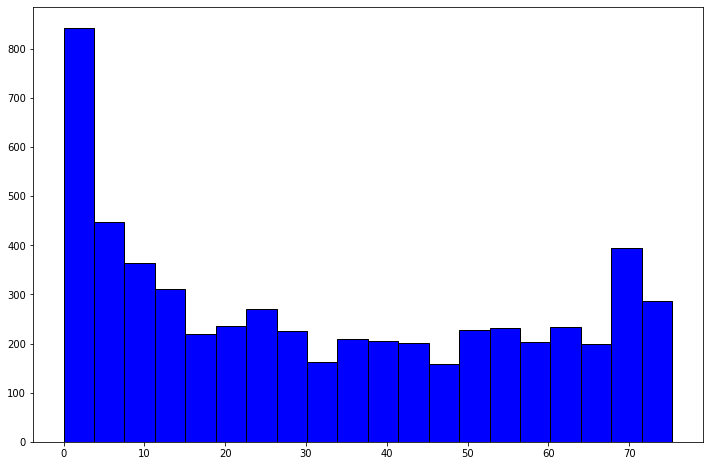

In [81]:
# Verificando o formato da distribuição:
plt.figure(figsize = (12, 8))
plt.hist(quantitativas['MesesNaCompanhia'], color = 'blue', edgecolor = 'black', bins = 20)

(array([942., 344.,  73.,  82.,  86., 204., 254., 263., 197., 179., 364.,
        370., 396., 358., 355., 331., 316., 290., 155.,  75.]),
 array([ 18.25 ,  23.275,  28.3  ,  33.325,  38.35 ,  43.375,  48.4  ,
         53.425,  58.45 ,  63.475,  68.5  ,  73.525,  78.55 ,  83.575,
         88.6  ,  93.625,  98.65 , 103.675, 108.7  , 113.725, 118.75 ]),
 <a list of 20 Patch objects>)

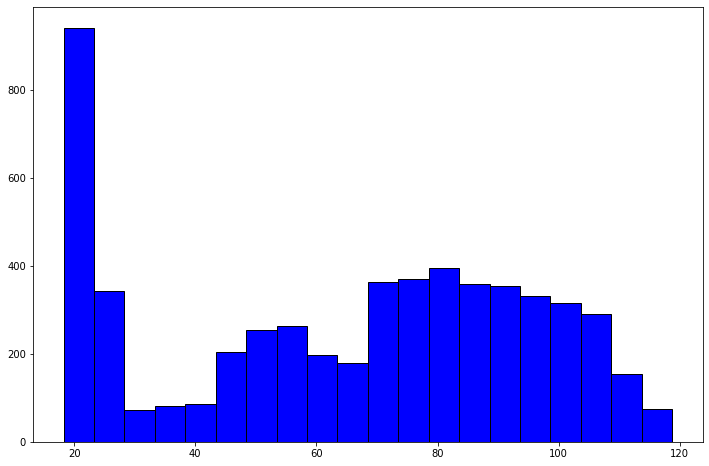

In [82]:
plt.figure(figsize = (12, 8))
plt.hist(quantitativas['CobrancaMensal'], color = 'blue', edgecolor = 'black', bins = 20)

(array([1512.,  673.,  546.,  430.,  292.,  258.,  209.,  200.,  174.,
         183.,  161.,  168.,  147.,  157.,  137.,  116.,  104.,   73.,
          64.,   30.]),
 array([  18.8,  452.1,  885.4, 1318.7, 1752. , 2185.3, 2618.6, 3051.9,
        3485.2, 3918.5, 4351.8, 4785.1, 5218.4, 5651.7, 6085. , 6518.3,
        6951.6, 7384.9, 7818.2, 8251.5, 8684.8]),
 <a list of 20 Patch objects>)

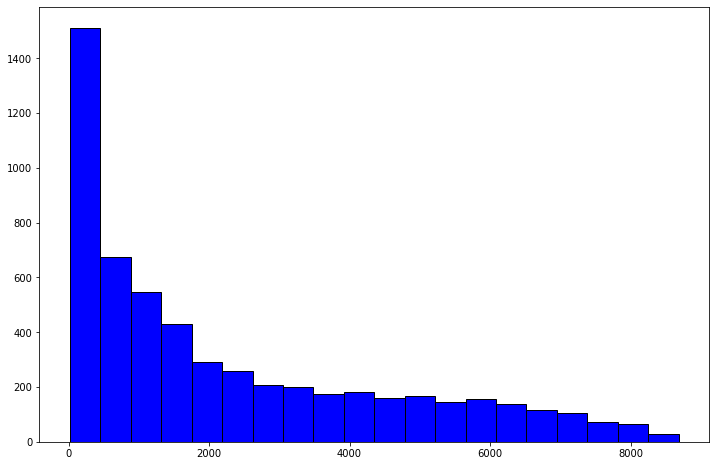

In [83]:
plt.figure(figsize = (12, 8))
plt.hist(quantitativas['CobrancaTotal'], color = 'blue', edgecolor = 'black', bins = 20)

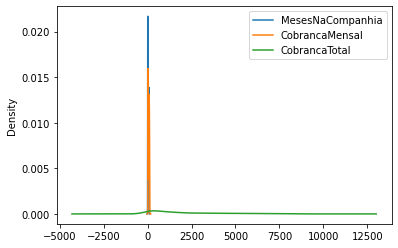

In [84]:
quantitativas.plot(kind = 'kde')

In [85]:
# 1a Transformação: StandardScaler
from sklearn.preprocessing import StandardScaler

quant_scale = StandardScaler().fit_transform(quantitativas)

In [86]:
quant_scale = pd.DataFrame(quant_scale, columns= quantitativas.columns)
quant_scale.describe()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
count,"5,634.00","5,634.00","5,634.00"
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.32,-1.54,-1.00
25%,-0.95,-0.97,-0.83
50%,-0.14,0.19,-0.39
75%,0.92,0.84,0.66
max,1.75,1.80,2.84


In [87]:
# 2a Transformação: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

quant_minmax = MinMaxScaler().fit_transform(quantitativas)
quant_minmax = pd.DataFrame(quant_minmax, columns= quantitativas.columns)
quant_minmax.describe()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
count,"5,634.00","5,634.00","5,634.00"
mean,0.43,0.46,0.26
std,0.33,0.30,0.26
min,0.00,0.00,0.00
25%,0.12,0.17,0.04
50%,0.38,0.52,0.16
75%,0.73,0.71,0.43
max,1.00,1.00,1.00


In [88]:
# 3a Transformação: RobustScaler
from sklearn.preprocessing import RobustScaler

quant_robust = RobustScaler().fit_transform(quantitativas)
quant_robust = pd.DataFrame(quant_minmax, columns= quantitativas.columns)
quant_robust.describe()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
count,"5,634.00","5,634.00","5,634.00"
mean,0.43,0.46,0.26
std,0.33,0.30,0.26
min,0.00,0.00,0.00
25%,0.12,0.17,0.04
50%,0.38,0.52,0.16
75%,0.73,0.71,0.43
max,1.00,1.00,1.00


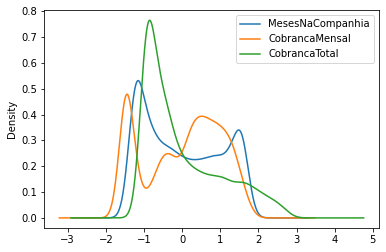

In [89]:
quant_scale.plot(kind= 'kde')

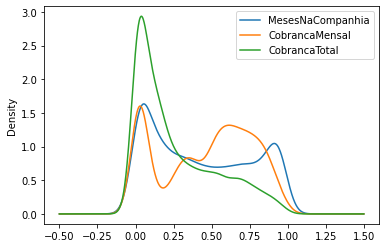

In [90]:
quant_minmax.plot(kind='kde')

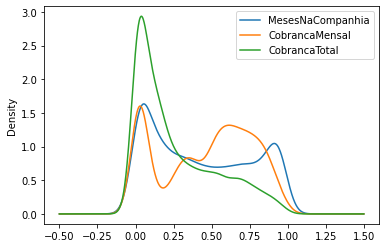

In [91]:
quant_robust.plot(kind = 'kde')

## Tratamento das variáveis categórias

In [92]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   genero                  5634 non-null   object
 1   Idoso                   5634 non-null   int64 
 2   TemParceiro             5634 non-null   object
 3   TemDependentes          5416 non-null   object
 4   TemTelefone             5634 non-null   object
 5   MaisLinhas              5634 non-null   object
 6   TemInternet             5634 non-null   object
 7   ServicoSegurancaOnline  5634 non-null   object
 8   ServicoBackupOnline     5634 non-null   object
 9   ServicoProtecaoOnline   5634 non-null   object
 10  ServicoSuporteOnline    5634 non-null   object
 11  ServicoTV               5634 non-null   object
 12  ServicoPctFilmes        5634 non-null   object
 13  Contrato                5634 non-null   object
 14  ContaOnline             5634 non-null   object
 15  Meto

Tratamento de valores faltantes

In [93]:
categoricas.isna().sum()

genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
dtype: int64

In [94]:
# Criar coluna TemDependentes2 e preencher os NaNs pela moda
categoricas['TemDependentes2'] = categoricas['TemDependentes']

In [95]:
categoricas.isna().sum()

genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
TemDependentes2           218
dtype: int64

In [96]:
categoricas['TemDependentes2'].mode()

0    No
dtype: object

In [97]:
categoricas['TemDependentes2'].fillna(value = 'No', inplace = True)
categoricas.isna().sum()

genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
TemDependentes2             0
dtype: int64

In [98]:
# Mesmo procedimento para a variável MetodoPagamento
# Criar coluna TemDependentes2 e preencher os NaNs pela moda
categoricas['MetodoPagamento2'] = categoricas['MetodoPagamento']
categoricas.isna().sum()

genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
TemDependentes2             0
MetodoPagamento2           99
dtype: int64

In [99]:
categoricas['MetodoPagamento2'].value_counts()

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: MetodoPagamento2, dtype: int64

In [100]:
categoricas['MetodoPagamento2'].fillna(value = 'Electronic check', inplace = True)
categoricas.isna().sum()

genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
TemDependentes2             0
MetodoPagamento2            0
dtype: int64

In [101]:
# Apaga as columnas TemDependentes e MetodoPagamento originais e renomeia TemDependentes2 e MetodoPagamento2:
categoricas.drop(columns = ['MetodoPagamento', 'TemDependentes'])
categoricas.columns = ['genero', 'Idoso', 'TemParceiro', 'TemDependentes', 'TemTelefone',
       'MaisLinhas', 'TemInternet', 'ServicoSegurancaOnline',
       'ServicoBackupOnline', 'ServicoProtecaoOnline', 'ServicoSuporteOnline',
       'ServicoTV', 'ServicoPctFilmes', 'Contrato', 'ContaOnline',
       'MetodoPagamento', 'TemDependentes', 'MetodoPagamento']

In [102]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   genero                  5634 non-null   object
 1   Idoso                   5634 non-null   int64 
 2   TemParceiro             5634 non-null   object
 3   TemDependentes          5416 non-null   object
 4   TemTelefone             5634 non-null   object
 5   MaisLinhas              5634 non-null   object
 6   TemInternet             5634 non-null   object
 7   ServicoSegurancaOnline  5634 non-null   object
 8   ServicoBackupOnline     5634 non-null   object
 9   ServicoProtecaoOnline   5634 non-null   object
 10  ServicoSuporteOnline    5634 non-null   object
 11  ServicoTV               5634 non-null   object
 12  ServicoPctFilmes        5634 non-null   object
 13  Contrato                5634 non-null   object
 14  ContaOnline             5634 non-null   object
 15  Meto

In [103]:
# Cria variáveis dummies
dummies = pd.get_dummies(categoricas, drop_first= True)
dummies.head().T

,0,1,2,3,4
Idoso,0,0,0,0,0
genero_Male,0,1,0,0,1
TemParceiro_Yes,0,1,1,0,1
TemDependentes_Yes,0,1,0,0,1
TemTelefone_Yes,0,1,1,1,1
MaisLinhas_No phone service,1,0,0,0,0
MaisLinhas_Yes,0,0,1,1,0
TemInternet_Fiber optic,0,0,1,1,1
TemInternet_No,0,1,0,0,0
ServicoSegurancaOnline_No internet service,0,1,0,0,0


## Criação dos datasets X e y

In [104]:
X = pd.concat([dados['id'], quant_scale, dummies], axis =1)

In [105]:
y = dados['Churn']

In [127]:
# Importar timeit (necessário para o RandomForestClassifier)
import timeit

#Importar o train_test_split e GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Importar modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Importa métricas
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, auc


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [119]:
X_train.shape

(4225, 35)

In [121]:
y_train.shape

(4225,)

In [122]:
X_test.shape

(1409, 35)

In [123]:
y_test.shape

(1409,)

In [128]:
# Instaciar o RandomForestClassifier 

mod_rf = RandomForestClassifier()  

In [131]:
# Criar dicionário de parâmetros para o RandomForestClassifier

dict_param_rf = {
    'n_estimators':[40,50,60,70],   # numero de estimadores que será testado. Quanto maior, mais exige poder computacional.
    'criterion':['gini', 'entropy'],   #  critérios
    'bootstrap':[False, True]
}
dict_param_rf

{'bootstrap': [False, True],
 'criterion': ['gini', 'entropy'],
 'n_estimators': [40, 50, 60, 70]}

In [132]:
grid_rf = GridSearchCV(mod_rf, dict_param_rf, scoring='accuracy', n_jobs=2, cv = 10)

In [133]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [134]:
grid_rf.best_params_

{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 40}

In [135]:
grid_rf.best_score_

0.8042620416120467

In [137]:
y_pred = grid_rf.predict(X_test)

In [138]:
accuracy_score(y_test, y_pred)

0.7842441447835344

In [139]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

Aplicando o modelo nos arquivo test.csv